# Avance 1 Equipo 20 – Análisis Exploratorio de Datos (EDA)

## Proyecto: Detección y Clasificación de Anillos en Galaxias
**Materia:** Proyecto Integrador
**Programa:** Maestría en Inteligencia Artificial Aplicada  
**Institución:** Tecnológico de Monterrey / UNAM  

**Equipo:** Equipo 20  
**Integrantes:**  
- Francisco Javier Rodríguez Echevarría - A01795970
- Gabriel Sareñana Labra - A01795507
- Yamil Abraham Nechar Reyes - A01795726

**Fecha:** 01/02/26

---

## Objetivo del notebook

El objetivo de este notebook es realizar un **Análisis Exploratorio de Datos (EDA)** del conjunto de datos proporcionado para el proyecto de detección y clasificación de anillos en galaxias.  

Este análisis tiene como finalidad:

- Comprender la **estructura y calidad de los datos** tabulares y de imagen.
- Identificar **valores faltantes, atípicos y posibles inconsistencias**.
- Analizar la **distribución de las variables** y la **cardinalidad de las etiquetas**.
- Detectar **tendencias, relaciones y posibles problemas** que puedan afectar el desempeño de modelos de aprendizaje automático.
- Justificar las **decisiones de preprocesamiento** necesarias para mejorar la generalización de los modelos.

Este avance se enmarca dentro de la fase **Data Understanding** de la metodología **CRISP-ML(Q)**.

---

## Fuente de los datos

El conjunto de datos utilizado en este proyecto proviene del trabajo de **Fernández et al. (2021)** y fue proporcionado por investigadores de la UNAM.  

Los datos consisten en:
- Una **tabla de galaxias** (en formato CSV/FITS) que contiene información astronómica como coordenadas celestes y etiquetas de tipo de anillo.
- **Imágenes de galaxias** descargadas desde el sitio **Legacy Survey (DESI)** a partir de las coordenadas de cada objeto.

Las imágenes corresponden a recortes centrados en cada galaxia, obtenidos en las bandas **g, r y z (grz)**.

---

## Alcance de este avance

En este notebook **no se entrena ningún modelo de aprendizaje automático**.  
El enfoque está exclusivamente en el análisis exploratorio y el preprocesamiento inicial de los datos.

Las tareas de modelado y evaluación se abordarán en avances posteriores.

## 1. Contexto del conjunto de datos y definición de etiquetas

El conjunto de datos utilizado en este proyecto corresponde a una muestra de galaxias analizadas en el trabajo la UNAM, en el cual se identifican y clasifican diferentes tipos de estructuras de anillos galácticos a partir de observaciones astronómicas.

La información proporcionada consiste en una **tabla de datos** que contiene, entre otras variables, las coordenadas celestes de cada galaxia y una etiqueta que describe el tipo de anillo observado. A partir de estas coordenadas (ascensión recta y declinación), se obtienen imágenes de las galaxias desde el **Legacy Survey (DESI)**, las cuales constituyen el insumo principal para los análisis de visión computacional.

---

## Variable `anillos`

La columna **`anillos`** representa una variable categórica codificada que describe el tipo de estructura observada en cada galaxia. Los valores posibles y su interpretación física son los siguientes:

- **2 – Anillo nuclear:**  
  Estructura circular o elíptica pequeña ubicada en la región central de la galaxia.

- **4 – Anillo interno:**  
  Estructura circular o elíptica cerrada que rodea la barra o el bulbo central de la galaxia.

- **8 – Anillo externo:**  
  Estructura circular o elíptica cerrada ubicada en las regiones externas de la galaxia, usualmente con un tamaño aproximadamente doble al de la barra (si existe).

- **12 – Anillo interno + externo:**  
  Galaxias que presentan simultáneamente un anillo interno y un anillo externo.

- **16 – Anillos parciales o pseudoanillos:**  
  Estructuras que no forman un anillo completamente cerrado y suelen estar asociadas a los brazos espirales.

Esta codificación implica que la variable `anillos` **no es binaria**, sino que contiene múltiples categorías con distinto significado físico y complejidad morfológica.

---

## Definición de las tareas del proyecto

De acuerdo con la descripción proporcionada por los investigadores, el proyecto contempla las siguientes tareas, ordenadas por complejidad:

1. **Clasificación binaria:**  
   Determinar si una galaxia presenta o no un **anillo interno y/o externo**.

2. **Clasificación multiclase:**  
   Para las galaxias con anillo, distinguir entre **anillos internos y externos**.

3. **Estimación de la distancia del anillo al centro de la galaxia:**  
   Tarea de mayor complejidad que involucra análisis geométrico sobre las imágenes.

En este avance, el análisis exploratorio se enfoca principalmente en **la primera tarea**, ya que constituye el problema base del proyecto y permite evaluar la calidad y distribución de los datos.

---

## Redefinición de etiquetas para la Tarea 1

Con el objetivo de abordar la clasificación binaria (con anillo vs sin anillo), se propone una **redefinición de la variable objetivo**:

- **Galaxias sin anillo:**  
  Aquellas que no presentan anillos internos ni externos.

- **Galaxias con anillo:**  
  Aquellas cuya etiqueta `anillos` indica la presencia de:
  - Anillo interno (4)
  - Anillo externo (8)
  - Anillo interno + externo (12)

Los **anillos nucleares (2)** y los **anillos parciales (16)** se consideran estructuras morfológicas más complejas de detectar y podrán ser:
- Excluidos del primer modelo, o
- Analizados de forma exploratoria para evaluar su impacto en la generalización del modelo.

Esta redefinición permite reducir la complejidad inicial del problema y mejorar la capacidad de generalización del modelo, alineándose con los objetivos del proyecto y con la fase de **Data Understanding** de la metodología **CRISP-ML(Q)**.


## 2. Setup del entorno y carga del conjunto de datos

Este notebook está diseñado para ejecutarse en un entorno de cómputo en la nube (Google Cloud / Google Colab).  
Debido al tamaño del conjunto de datos y a las buenas prácticas de versionamiento, **los archivos de datos no se almacenan directamente en el repositorio de GitHub**.

### Almacenamiento del dataset

El archivo `dataset.csv` debe cargarse previamente en una ubicación accesible desde el entorno de ejecución, por ejemplo:

- **Google Drive**, montado desde Google Colab
- Un bucket de almacenamiento en la nube (opcional)

### Uso de Google Drive compartido

Para facilitar el trabajo colaborativo, el dataset y los notebooks pueden almacenarse en un **Google Drive compartido del equipo**.  
Al ejecutar el notebook en Google Colab, cada integrante montará su propio Drive, pero el Drive compartido será accesible siempre que se cuenten con los permisos correspondientes.

En este proyecto se asume que:
- El dataset se encuentra almacenado en Google Drive
- El notebook accede al archivo a través de una ruta definida por el usuario

Esta estrategia permite:
- Mantener el repositorio ligero
- Facilitar la colaboración
- Garantizar la reproducibilidad del análisis


In [1]:
# =========================================
# Notebook: EDA
# Proyecto: Detección de anillos en galaxias
# =========================================

# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Configuración general
# =========================
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 10

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

# =========================
# Montar Google Drive
# =========================
from google.colab import drive
drive.mount("/content/drive")

# Config / Load
BASE_PATH = "/content/drive/MyDrive/Capstone Project/Entregables/Proyecto/"

DATA_PATH = os.path.join(BASE_PATH, "Dataset")
OUTPUT_PATH = os.path.join(BASE_PATH, "Outputs")

os.makedirs(OUTPUT_PATH, exist_ok=True)

DATASET_PATH = os.path.join(DATA_PATH, "dataset.csv")

df = pd.read_csv(DATASET_PATH)

print("Dataset cargado")
print("Shape:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset cargado
Shape: (8528, 5)


objID         ra        dec         z  anillos
0  1237648721210769659  134.44717  -0.199973  0.028206      0.0
1  1237648705657307354  198.23356   0.941188  0.048037      0.0
2  1237648705120895059  199.29492   0.527571  0.024114      0.0
3  1237648720150724863  165.74061  -0.962095  0.033483      0.0
4  1237649919509594232   31.37202  13.251016  0.024694      0.0

## 3. Estructura del conjunto de datos y descripción de variables

En esta sección se analiza la estructura general del conjunto de datos, incluyendo el número de observaciones, tipos de variables y estadísticas descriptivas básicas.  

El objetivo es comprender qué información contiene el dataset y verificar que los datos sean consistentes antes de realizar análisis más profundos.


In [2]:
# Vista general del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8528 entries, 0 to 8527
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   objID    8528 non-null   int64  
 1   ra       8528 non-null   float64
 2   dec      8528 non-null   float64
 3   z        8528 non-null   float64
 4   anillos  8528 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 333.3 KB


In [3]:
# =========================
# Estadísticas descriptivas
# =========================
df.describe(include="all")


objID           ra          dec            z      anillos
count  8.528000e+03  8528.000000  8528.000000  8528.000000  8528.000000
mean   1.237662e+18   183.268013    25.180086     0.035896     1.767589
std    5.887859e+12    59.249332    18.394527     0.015032     4.059707
min    1.237649e+18     0.008759   -11.082615     0.010068     0.000000
25%    1.237658e+18   153.145473    10.446179     0.024653     0.000000
50%    1.237662e+18   185.068475    23.905970     0.033006     0.000000
75%    1.237666e+18   219.528357    39.203309     0.044839     0.000000
max    1.237680e+18   359.276680    70.133229     0.098892    16.000000

In [4]:
# =========================
# Nombres de columnas
# =========================
df.columns


Index(['objID', 'ra', 'dec', 'z', 'anillos'], dtype='object')

## 4. Calidad del conjunto de datos

Antes de realizar análisis más avanzados, es fundamental evaluar la calidad del conjunto de datos.  
En esta sección se analizan aspectos clave como la presencia de valores faltantes, duplicados y la consistencia de los rangos de las variables, con el fin de identificar posibles problemas que requieran preprocesamiento.


In [5]:
# =========================
# Valores faltantes
# =========================
missing_values = df.isnull().sum()
missing_values


objID      0
ra         0
dec        0
z          0
anillos    0
dtype: int64

In [6]:
# =========================
# Filas duplicadas
# =========================
duplicated_rows = df.duplicated().sum()
duplicated_rows


np.int64(0)

In [7]:
# =========================
# Revisión de rangos físicos plausibles
# =========================
ranges = {
    "ra": (0, 360),
    "dec": (-90, 90),
    "z": (0, None)
}

for col, (min_val, max_val) in ranges.items():
    col_min = df[col].min()
    col_max = df[col].max()
    print(f"{col}: min={col_min:.3f}, max={col_max:.3f}")


ra: min=0.009, max=359.277
dec: min=-11.083, max=70.133
z: min=0.010, max=0.099


In [8]:
#Validación de la columna 'anillos'
TARGET_COL = "anillos"

if TARGET_COL not in df.columns:
    raise KeyError(f"No existe la columna '{TARGET_COL}' en el dataset. Columnas disponibles: {list(df.columns)[:25]} ...")

print("Columna objetivo encontrada:", TARGET_COL)
print("Tipo de dato:", df[TARGET_COL].dtype)

# Conteo de nulos en target
print("Nulos en anillos:", df[TARGET_COL].isna().sum())

# Valores únicos en target
unique_vals = pd.Series(df[TARGET_COL].dropna().unique()).sort_values()
print("\nValores únicos en 'anillos' (sin NaN):")
print(unique_vals.to_list())

Columna objetivo encontrada: anillos
Tipo de dato: float64
Nulos en anillos: 0

Valores únicos en 'anillos' (sin NaN):
[0.0, 2.0, 4.0, 8.0, 12.0, 16.0]


### Conclusiones sobre la calidad de los datos

A partir del análisis de calidad del conjunto de datos, se obtienen las siguientes observaciones:

- No se identificaron **valores faltantes** en ninguna de las variables del dataset (`objID`, `ra`, `dec`, `z` y `anillos`). Todas las 8,528 observaciones cuentan con información completa, lo que elimina la necesidad de aplicar estrategias de imputación en esta etapa.

- No se detectaron **filas duplicadas** dentro del conjunto de datos, ni a nivel de registros completos ni considerando el identificador `objID`, lo que indica que cada galaxia está representada de manera única en la tabla.

- Las variables astronómicas presentan **rangos físicamente plausibles**:
  - `ra` se encuentra en el intervalo aproximado **[0.009°, 359.277°]**, consistente con el rango esperado para la ascensión recta.
  - `dec` toma valores entre **[-11.083°, 70.133°]**, dentro del rango válido para la declinación.
  - `z` presenta valores entre **0.010 y 0.099**, correspondientes a galaxias relativamente cercanas, coherentes con el alcance del estudio.

- La variable `anillos` se encuentra codificada como numérica, pero representa una **variable categórica discreta**, lo cual será considerado explícitamente en los análisis posteriores y en la definición de la variable objetivo.

En conjunto, estos resultados indican que el dataset presenta **buena calidad y consistencia estructural**, permitiendo avanzar hacia el análisis exploratorio univariante y bivariado sin requerir correcciones inmediatas en esta fase.


## 5. Análisis univariante

El análisis univariante permite estudiar la distribución de cada variable de forma individual, con el objetivo de identificar patrones, valores atípicos, sesgos y características relevantes del conjunto de datos.

En esta sección se analizan las variables numéricas (`ra`, `dec`, `z`) y la variable categórica `anillos`, utilizando estadísticas descriptivas y técnicas de visualización apropiadas para cada caso.


### 5.1 Variables numéricas: ra, dec y z

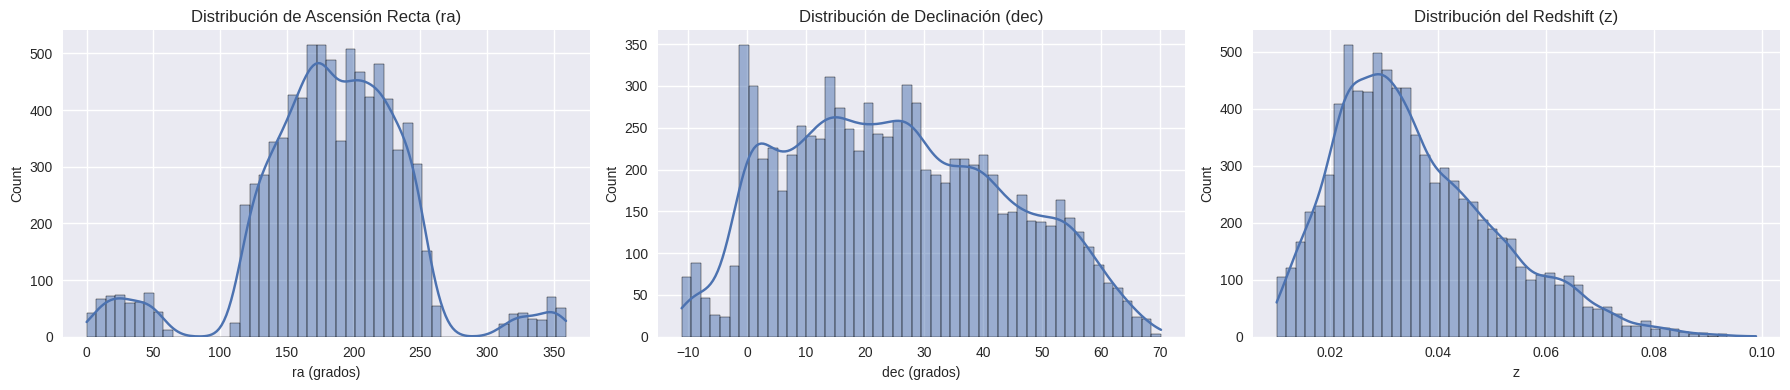

In [9]:
# =========================
# Histogramas de variables numéricas
# =========================
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(df["ra"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribución de Ascensión Recta (ra)")
axes[0].set_xlabel("ra (grados)")

sns.histplot(df["dec"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribución de Declinación (dec)")
axes[1].set_xlabel("dec (grados)")

sns.histplot(df["z"], bins=50, kde=True, ax=axes[2])
axes[2].set_title("Distribución del Redshift (z)")
axes[2].set_xlabel("z")

plt.tight_layout()
plt.show()


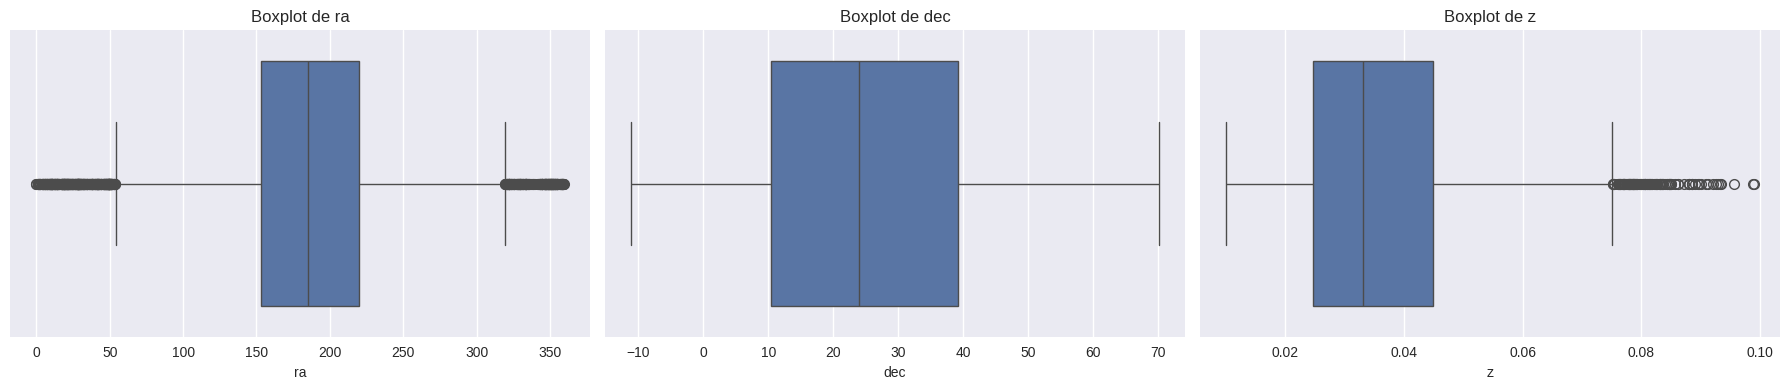

In [10]:
# =========================
# Boxplots para detectar valores atípicos
# =========================
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.boxplot(x=df["ra"], ax=axes[0])
axes[0].set_title("Boxplot de ra")

sns.boxplot(x=df["dec"], ax=axes[1])
axes[1].set_title("Boxplot de dec")

sns.boxplot(x=df["z"], ax=axes[2])
axes[2].set_title("Boxplot de z")

plt.tight_layout()
plt.show()


### Interpretación de las variables numéricas

- La variable **`ra` (ascensión recta)** no presenta una distribución completamente uniforme. Se observa una mayor concentración de galaxias en el intervalo aproximado **[120°, 260°]**, con menor densidad de observaciones hacia los extremos del rango. Este comportamiento sugiere que el conjunto de datos cubre regiones específicas del cielo, en lugar de una distribución homogénea en toda la esfera celeste.

- La variable **`dec` (declinación)** muestra una distribución claramente no uniforme, con una mayor concentración de observaciones en valores positivos y un rango predominante entre **0° y 50°**. Esta asimetría es consistente con las limitaciones geométricas y de cobertura del estudio observacional del cual se derivan los datos.

- El **redshift (`z`)** presenta una distribución asimétrica con sesgo positivo, concentrando la mayoría de las observaciones en valores bajos (aproximadamente entre **0.01 y 0.05**), y una cola hacia valores mayores. Esto indica que la muestra está compuesta principalmente por galaxias relativamente cercanas, lo cual es coherente con el rango reportado en las estadísticas descriptivas.

- A partir de los boxplots, se identifican valores extremos principalmente en la variable **`z`**, correspondientes a galaxias con mayor redshift. Sin embargo, estos valores no se consideran errores ni anomalías, sino parte natural de la distribución física del fenómeno observado. Por esta razón, **no se eliminan valores atípicos en esta etapa**, aunque se reconoce que la distribución sesgada de `z` podría motivar la aplicación de transformaciones no lineales en fases posteriores del modelado.


### 5.2 Variable categórica: anillos

In [11]:
# =========================
# Conteo de clases de la variable 'anillos'
# =========================
anillos_counts = df["anillos"].value_counts().sort_index()
anillos_counts


anillos
0.0     6660
2.0      111
4.0      857
8.0      186
12.0     372
16.0     342
Name: count, dtype: int64

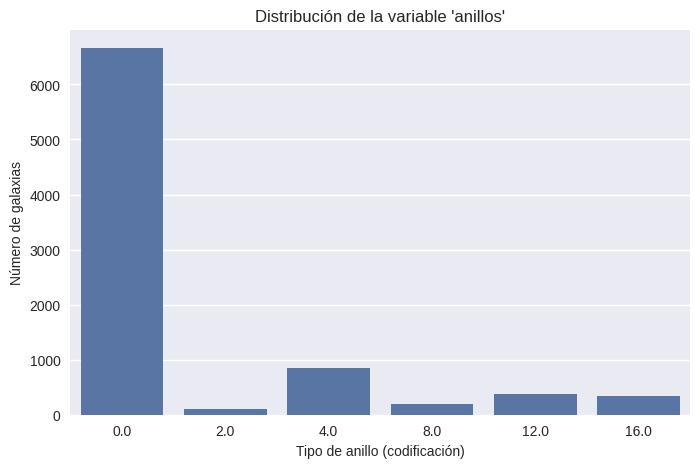

In [12]:
# =========================
# Gráfica de barras de la variable 'anillos'
# =========================
plt.figure(figsize=(8, 5))
sns.barplot(x=anillos_counts.index, y=anillos_counts.values)
plt.title("Distribución de la variable 'anillos'")
plt.xlabel("Tipo de anillo (codificación)")
plt.ylabel("Número de galaxias")
plt.show()


In [13]:
# Diccionario de mapeo (código -> interpretación física)
ANILLOS_MAP = {
    2:  "Anillo nuclear",
    4:  "Anillo interno",
    8:  "Anillo externo",
    12: "Anillo interno + externo",
    16: "Anillos parciales / pseudoanillos"
}

# Columna con etiqueta legible
df["anillos_label"] = df[TARGET_COL].map(ANILLOS_MAP)

# Identificar códigos fuera de catálogo
invalid_codes = sorted(set(df[TARGET_COL].dropna().unique()) - set(ANILLOS_MAP.keys()))
print("Códigos fuera de catálogo:", invalid_codes)

# Ver filas problemáticas (si existen)
if invalid_codes:
    display(df[df[TARGET_COL].isin(invalid_codes)].head(10))

# Nulos de label (incluye NaN y códigos no mapeados)
print("Nulos en anillos_label:", df["anillos_label"].isna().sum())

df[[TARGET_COL, "anillos_label"]].head(10)

Códigos fuera de catálogo: [np.float64(0.0)]


objID          ra        dec         z  anillos anillos_label
0  1237648721210769659  134.447170  -0.199973  0.028206      0.0           NaN
1  1237648705657307354  198.233560   0.941188  0.048037      0.0           NaN
2  1237648705120895059  199.294920   0.527571  0.024114      0.0           NaN
3  1237648720150724863  165.740610  -0.962095  0.033483      0.0           NaN
4  1237649919509594232   31.372020  13.251016  0.024694      0.0           NaN
5  1237649919508742339   29.482672  13.358159  0.044325      0.0           NaN
6  1237648702973542469  199.541950  -1.243647  0.019151      0.0           NaN
7  1237648703503794332  184.470380  -0.657224  0.029612      0.0           NaN
8  1237648721754587278  150.299480   0.329321  0.034489      0.0           NaN
9  1237648721754718358  150.628460   0.307289  0.033677      0.0           NaN

Nulos en anillos_label: 6660


anillos anillos_label
0      0.0           NaN
1      0.0           NaN
2      0.0           NaN
3      0.0           NaN
4      0.0           NaN
5      0.0           NaN
6      0.0           NaN
7      0.0           NaN
8      0.0           NaN
9      0.0           NaN

In [14]:
#Distribución de clases (frecuencia y porcentaje)
dist_abs = df["anillos_label"].value_counts(dropna=False)
dist_pct = df["anillos_label"].value_counts(dropna=False, normalize=True) * 100

dist_table = pd.DataFrame({
    "frecuencia": dist_abs,
    "porcentaje_%": dist_pct.round(2)
})

display(dist_table)

# Solo clases válidas (sin NaN)
valid_dist = df["anillos_label"].value_counts()
valid_pct = df["anillos_label"].value_counts(normalize=True) * 100
valid_table = pd.DataFrame({"frecuencia": valid_dist, "porcentaje_%": valid_pct.round(2)})
print("\nDistribución (solo clases válidas):")
display(valid_table)


frecuencia  porcentaje_%
anillos_label                                              
NaN                                      6660         78.10
Anillo interno                            857         10.05
Anillo interno + externo                  372          4.36
Anillos parciales / pseudoanillos         342          4.01
Anillo externo                            186          2.18
Anillo nuclear                            111          1.30


Distribución (solo clases válidas):


frecuencia  porcentaje_%
anillos_label                                              
Anillo interno                            857         45.88
Anillo interno + externo                  372         19.91
Anillos parciales / pseudoanillos         342         18.31
Anillo externo                            186          9.96
Anillo nuclear                            111          5.94

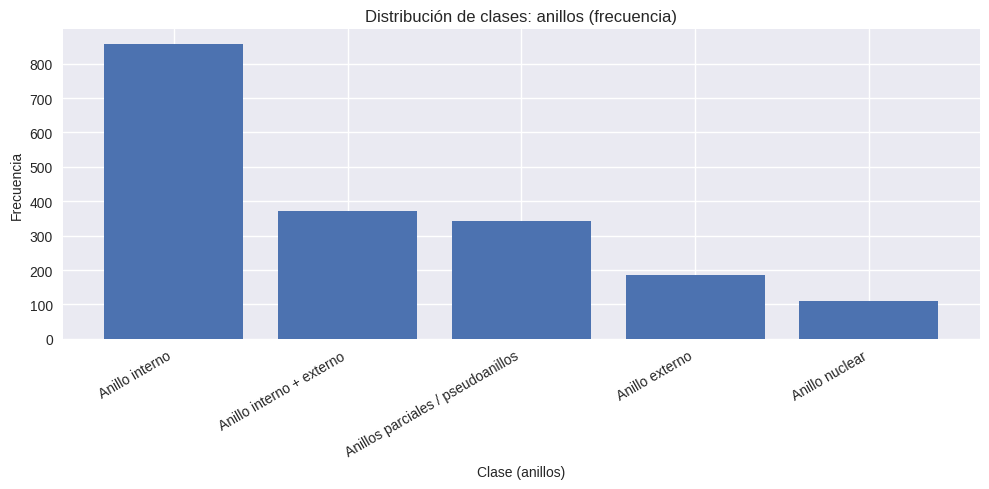

In [15]:
# Gráfico de barras - frecuencias (matplotlib, sin seaborn)
counts = df["anillos_label"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribución de clases: anillos (frecuencia)")
plt.xlabel("Clase (anillos)")
plt.ylabel("Frecuencia")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

### Interpretación de la variable categórica `anillos`

La variable `anillos` presenta una **distribución fuertemente desbalanceada**. Del total de **8,528 galaxias**, **6,660** corresponden a galaxias **sin anillos**, lo que representa aproximadamente el **78 %** del conjunto de datos.

Las clases asociadas a la presencia de anillos constituyen una proporción significativamente menor y se distribuyen de la siguiente manera:
- **Anillo nuclear (2):** 111 galaxias  
- **Anillo interno (4):** 857 galaxias  
- **Anillo externo (8):** 186 galaxias  
- **Anillo interno + externo (12):** 372 galaxias  
- **Anillos parciales o pseudoanillos (16):** 342 galaxias  

Este desbalance es coherente con las estadísticas descriptivas del dataset, donde los percentiles 25, 50 y 75 de la variable `anillos` toman el valor cero, indicando que más de la mitad de las observaciones no presentan estructuras de anillo.

Desde la perspectiva de aprendizaje automático, este comportamiento puede afectar el desempeño de modelos de clasificación, ya que un modelo entrenado directamente sobre estas etiquetas tendería a favorecer la clase mayoritaria (galaxias sin anillo).

Por esta razón, será necesario considerar estrategias específicas para mitigar el desbalance de clases en etapas posteriores del proyecto, tales como la ponderación de clases durante el entrenamiento, técnicas de submuestreo o sobremuestreo, y el uso de aumento de datos (data augmentation) sobre las clases minoritarias.




## 6. Ingeniería de la variable objetivo

Con base en el análisis exploratorio previo, se procede a definir formalmente la **variable objetivo** para la primera tarea del proyecto:  
la **clasificación binaria de galaxias sin anillo vs galaxias con anillo interno y/o externo**.

Dado que la variable original `anillos` contiene múltiples categorías con distinto significado físico y una distribución altamente desbalanceada, se propone una transformación que permita reducir la complejidad del problema inicial y mejorar la capacidad de generalización de los modelos.


frecuencia  porcentaje_%
complejidad_morfologica                          
NaN                            6660         78.10
Menor                           968         11.35
Mayor                           900         10.55

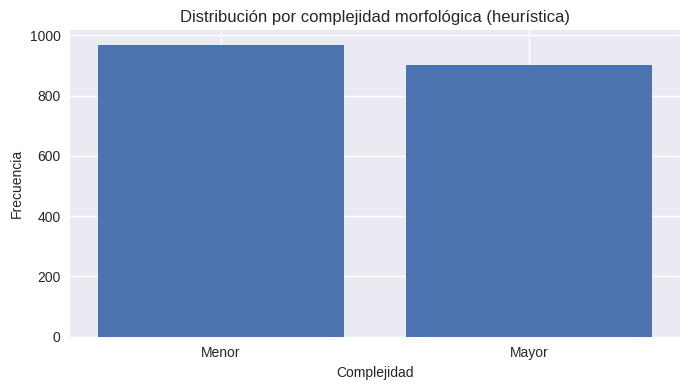

In [16]:
# Tabla de "complejidad morfológica" (heurística)
# (Esto no viene del dataset; es un criterio interpretativo útil para el reporte)
complexity_map = {
    "Anillo nuclear": "Menor",
    "Anillo interno": "Menor",
    "Anillo externo": "Mayor",
    "Anillo interno + externo": "Mayor",
    "Anillos parciales / pseudoanillos": "Mayor"
}

df["complejidad_morfologica"] = df["anillos_label"].map(complexity_map)

comp_abs = df["complejidad_morfologica"].value_counts(dropna=False)
comp_pct = df["complejidad_morfologica"].value_counts(dropna=False, normalize=True) * 100

comp_table = pd.DataFrame({
    "frecuencia": comp_abs,
    "porcentaje_%": comp_pct.round(2)
})

display(comp_table)

# Plot complejidad
comp_counts = df["complejidad_morfologica"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(7, 4))
plt.bar(comp_counts.index.astype(str), comp_counts.values)
plt.title("Distribución por complejidad morfológica (heurística)")
plt.xlabel("Complejidad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

La distribución por complejidad morfológica muestra que el conjunto de datos está relativamente balanceado entre galaxias con estructuras simples (Menor) y estructuras más complejas (Mayor), con una ligera predominancia de las primeras.

Esto indica que:

El dataset no está fuertemente sesgado hacia un solo nivel de complejidad.

El modelo de visión computacional tendrá exposición suficiente tanto a patrones anulares simples como a estructuras más complejas y fragmentadas.

No se anticipa, a priori, la necesidad de técnicas agresivas de balanceo a este nivel de abstracción (simple vs compleja), aunque sí puede ser necesario a nivel de clases individuales.

## 7. Análisis bivariado

El análisis bivariado permite explorar la relación entre pares de variables, en particular entre las variables explicativas y la variable objetivo definida para la Tarea 1 (`target_ring`).

En esta sección se analiza la relación entre el redshift (`z`) y la presencia de anillos, con el fin de identificar posibles tendencias o diferencias entre galaxias con y sin anillo que puedan ser relevantes para el modelado posterior.


In [17]:
# Revisión de columnas numéricas vs anillos (si aplica)
# Útil si el dataset  llegara a tener features numéricas (ej. tamaño, brillo, etc.)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Quitamos la propia columna target para evitar confusión
numeric_cols = [c for c in numeric_cols if c != TARGET_COL]

print("Columnas numéricas detectadas (excluyendo target):", numeric_cols)

if numeric_cols:
    # Resumen estadístico por clase (mediana + IQR)
    summary = df.groupby("anillos_label")[numeric_cols].agg(["count", "median", "mean", "std"])
    display(summary)
else:
    print("ℹNo se detectaron columnas numéricas adicionales para análisis por clase.")


Columnas numéricas detectadas (excluyendo target): ['objID', 'ra', 'dec', 'z']


objID                                              ra                                     dec                                      z                              
                                  count        median          mean           std count     median        mean        std count     median       mean        std count    median      mean       std
anillos_label                                                                                                                                                                                       
Anillo externo                      186  1.237662e+18  1.237661e+18  6.236694e+12   186  193.13188  187.030476  60.379262   186  24.049263  24.554498  18.306504   186  0.039868  0.040442  0.014559
Anillo interno                      857  1.237662e+18  1.237662e+18  6.053767e+12   857  174.18970  176.730032  59.432179   857  23.036650  24.888643  18.846921   857  0.033476  0.036084  0.013378
Anillo interno + externo            372  1.237662e+18  1.237662e+18  5.881492e+12   372  176.26760  180.663772  62.122313   372  27.002028  26.532625  18.378854   372  0.033556  0.036127  0.013468
Anillo nuclear                      111  1.237662e+18  1.237663e+18  6.253915e+12   111  157.68574  163.712784  58.334451   111  24.298685  27.629988  18.452901   111  0.030140  0.031869  0.011721
Anillos parciales / pseudoanillos   342  1.237662e+18  1.237661e+18  6.039571e+12   342  156.41099  159.304003  57.757467   342  25.254855  26.439951  19.361321   342  0.037128  0.039271  0.014478

/tmp/ipython-input-1074438547.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


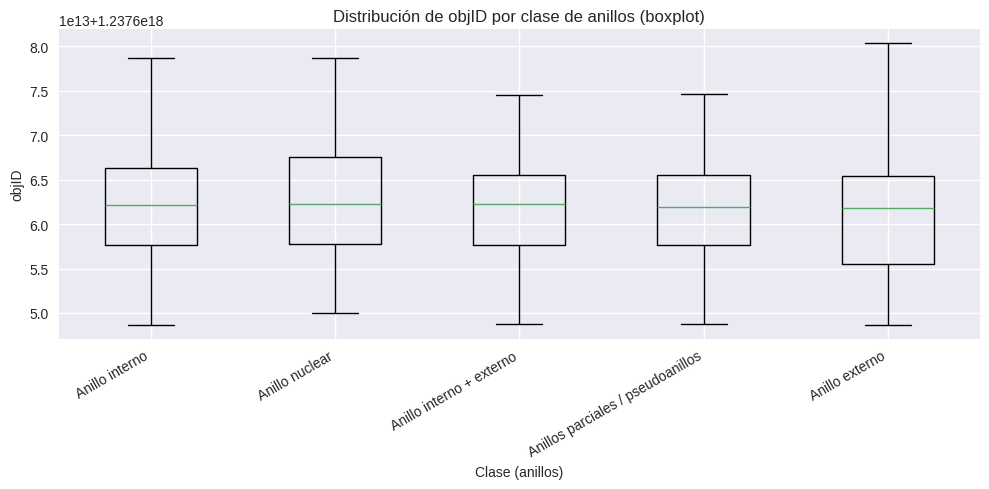

/tmp/ipython-input-1074438547.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


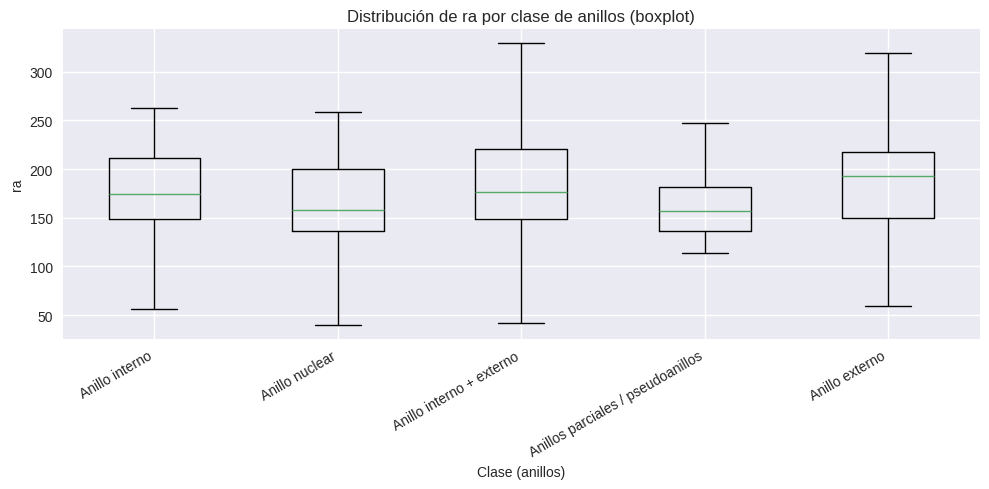

/tmp/ipython-input-1074438547.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


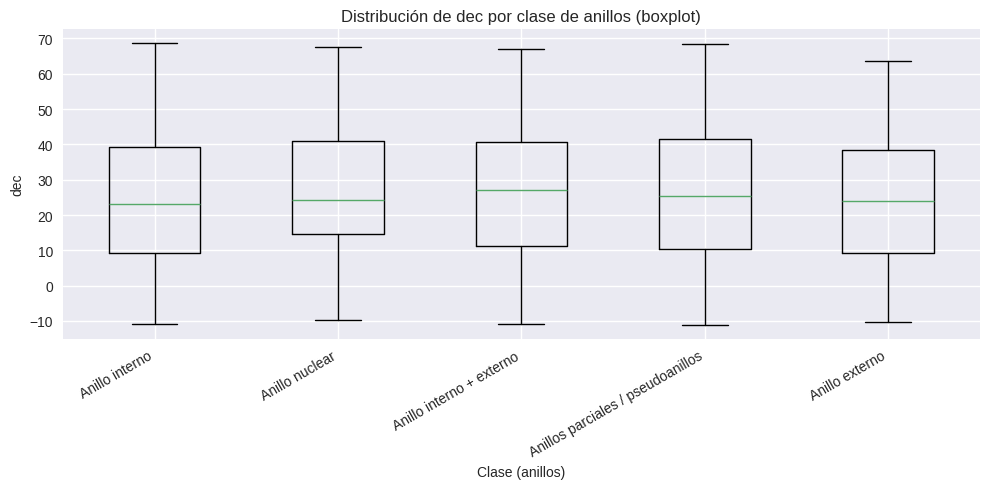

/tmp/ipython-input-1074438547.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


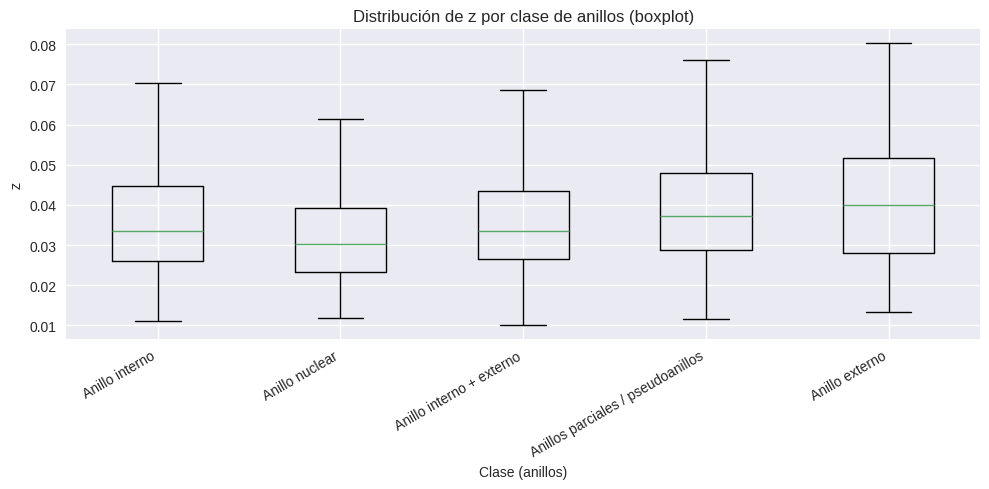

In [18]:
# Boxplots por clase (solo si hay numéricas)
if numeric_cols:
    for col in numeric_cols[:10]:  # limite a 10 para no saturar
        data = [df.loc[df["anillos_label"] == cls, col].dropna().values for cls in df["anillos_label"].dropna().unique()]
        labels = list(df["anillos_label"].dropna().unique())

        plt.figure(figsize=(10, 5))
        plt.boxplot(data, labels=labels, showfliers=False)
        plt.title(f"Distribución de {col} por clase de anillos (boxplot)")
        plt.xlabel("Clase (anillos)")
        plt.ylabel(col)
        plt.xticks(rotation=30, ha="right")
        plt.tight_layout()
        plt.show()


In [19]:
# Chequeos finales recomendados para ML
# - Muestra de filas con target nulo o no mapeado (para decidir si filtrar)
mask_problem = df[TARGET_COL].isna() | df["anillos_label"].isna()

print("Filas con target nulo o no mapeado:", mask_problem.sum())
display(df.loc[mask_problem, df.columns].head(15))

# Dataset listo para modelado (solo clases válidas)
df_ml = df.loc[~mask_problem].copy()
print("\n df_ml listo para ML (sin NaN/no mapeados)")
print("Shape df_ml:", df_ml.shape)
df_ml.head()

Filas con target nulo o no mapeado: 6660


objID          ra        dec         z  anillos anillos_label complejidad_morfologica
0   1237648721210769659  134.447170  -0.199973  0.028206      0.0           NaN                     NaN
1   1237648705657307354  198.233560   0.941188  0.048037      0.0           NaN                     NaN
2   1237648705120895059  199.294920   0.527571  0.024114      0.0           NaN                     NaN
3   1237648720150724863  165.740610  -0.962095  0.033483      0.0           NaN                     NaN
4   1237649919509594232   31.372020  13.251016  0.024694      0.0           NaN                     NaN
5   1237649919508742339   29.482672  13.358159  0.044325      0.0           NaN                     NaN
6   1237648702973542469  199.541950  -1.243647  0.019151      0.0           NaN                     NaN
7   1237648703503794332  184.470380  -0.657224  0.029612      0.0           NaN                     NaN
8   1237648721754587278  150.299480   0.329321  0.034489      0.0           NaN                     NaN
9   1237648721754718358  150.628460   0.307289  0.033677      0.0           NaN                     NaN
10  1237648702966988820  184.535660  -1.064119  0.019025      0.0           NaN                     NaN
11  1237648722291392551  150.101530   0.704594  0.033373      0.0           NaN                     NaN
12  1237648722291523676  150.356000   0.833204  0.046037      0.0           NaN                     NaN
13  1237648703503401151  183.547170  -0.831590  0.024842      0.0           NaN                     NaN
14  1237648702975180927  203.229690  -1.159490  0.012687      0.0           NaN                     NaN


 df_ml listo para ML (sin NaN/no mapeados)
Shape df_ml: (1868, 7)


objID        ra        dec         z  anillos   anillos_label complejidad_morfologica
6660  1237652946379079804  2.142880 -10.949290  0.030352      4.0  Anillo interno                   Menor
6661  1237652942639398970  2.282928  14.465533  0.041430      2.0  Anillo nuclear                   Menor
6662  1237663783662256198  3.992692  -0.303504  0.039373      4.0  Anillo interno                   Menor
6663  1237672796109144083  4.074376  -9.134164  0.036546      4.0  Anillo interno                   Menor
6664  1237652946917523563  5.761652 -10.554394  0.041292      4.0  Anillo interno                   Menor

## 7.2 Exploración de imágenes y chequeos básicos

Además de la tabla con variables astronómicas, este proyecto utiliza **imágenes de galaxias** obtenidas desde el sitio **Legacy Survey (DESI)** mediante recortes centrados en las coordenadas (`ra`, `dec`) de cada objeto.

Las imágenes corresponden al **layer ls-dr9** y se descargan en formato JPEG combinando las bandas **g, r y z (grz)**.

En esta sección se realiza un EDA básico de las imágenes para:
- Verificar cuántas imágenes existen respecto al número de filas en la tabla.
- Detectar archivos corruptos o que no puedan leerse.
- Caracterizar dimensiones (alto/ancho) y número de canales.
- Visualizar ejemplos por clase (sin anillo vs con anillo).

Este análisis permitirá identificar problemas potenciales que afecten el desempeño del modelo (normalización, redimensionamiento, calidad visual, etc.).


In [20]:
# =========================
# Ruta de imágenes (dentro del proyecto)
# =========================
IMAGE_DIR = os.path.join(BASE_PATH, "Images")
os.makedirs(IMAGE_DIR, exist_ok=True)

print("Ruta de imágenes:", IMAGE_DIR)
print("Número de archivos en IMAGE_DIR:", len(os.listdir(IMAGE_DIR)))


Ruta de imágenes: /content/drive/MyDrive/Capstone Project/Entregables/Proyecto/Images
Número de archivos en IMAGE_DIR: 0


In [21]:
import urllib.request

def download_legacy_jpg(ra, dec, out_path, size=800, pixscale=0.262, layer="ls-dr9", bands="grz"):
    url = (
        f"https://www.legacysurvey.org/viewer/jpeg-cutout?"
        f"ra={ra}&dec={dec}&size={size}&layer={layer}&pixscale={pixscale}&bands={bands}"
    )
    urllib.request.urlretrieve(url, out_path)

# Descargar una muestra (para EDA)
N_SAMPLE = 200
sample_df = df.sample(n=min(N_SAMPLE, len(df)), random_state=42)

downloaded = 0
for _, row in sample_df.iterrows():
    fname = f"{int(row['objID'])}.jpg"
    fpath = os.path.join(IMAGE_DIR, fname)
    if not os.path.exists(fpath):
        try:
            download_legacy_jpg(row["ra"], row["dec"], fpath)
            downloaded += 1
        except Exception as e:
            pass

print("Imágenes descargadas en esta corrida:", downloaded)
print("Total de imágenes en carpeta:", len(os.listdir(IMAGE_DIR)))


Imágenes descargadas en esta corrida: 200
Total de imágenes en carpeta: 200


In [22]:
from PIL import Image

# Mapeo: objID -> path
image_paths = {}
for fn in os.listdir(IMAGE_DIR):
    if fn.lower().endswith(".jpg"):
        key = fn.replace(".jpg", "")
        image_paths[key] = os.path.join(IMAGE_DIR, fn)

# ¿Cuántas filas del df tienen imagen?
df["img_path"] = df["objID"].astype(str).map(image_paths)
n_with_img = df["img_path"].notnull().sum()
n_without_img = df["img_path"].isnull().sum()

print(f"Filas con imagen: {n_with_img} / {len(df)}")
print(f"Filas sin imagen: {n_without_img} / {len(df)}")


Filas con imagen: 200 / 8528
Filas sin imagen: 8328 / 8528


In [23]:
dims = []
channels = []
corrupt = 0

sample_paths = df["img_path"].dropna().sample(n=min(300, n_with_img), random_state=42)

for p in sample_paths:
    try:
        with Image.open(p) as im:
            im = im.convert("RGB")
            w, h = im.size
            dims.append((h, w))
            channels.append(3)
    except Exception:
        corrupt += 1

dims = np.array(dims)
print("Imágenes analizadas:", len(dims))
print("Corruptas/no legibles:", corrupt)
print("Altura (px): min/median/max =", int(dims[:,0].min()), int(np.median(dims[:,0])), int(dims[:,0].max()))
print("Ancho  (px): min/median/max =", int(dims[:,1].min()), int(np.median(dims[:,1])), int(dims[:,1].max()))


Imágenes analizadas: 200
Corruptas/no legibles: 0
Altura (px): min/median/max = 800 800 800
Ancho  (px): min/median/max = 800 800 800


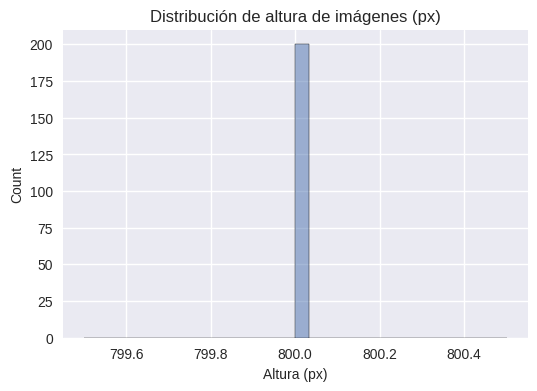

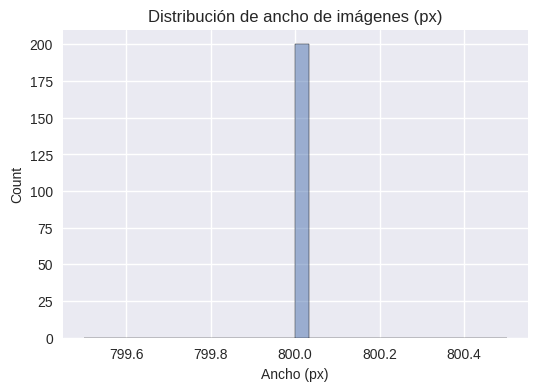

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(dims[:,0], bins=30, kde=True)
plt.title("Distribución de altura de imágenes (px)")
plt.xlabel("Altura (px)")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(dims[:,1], bins=30, kde=True)
plt.title("Distribución de ancho de imágenes (px)")
plt.xlabel("Ancho (px)")
plt.show()


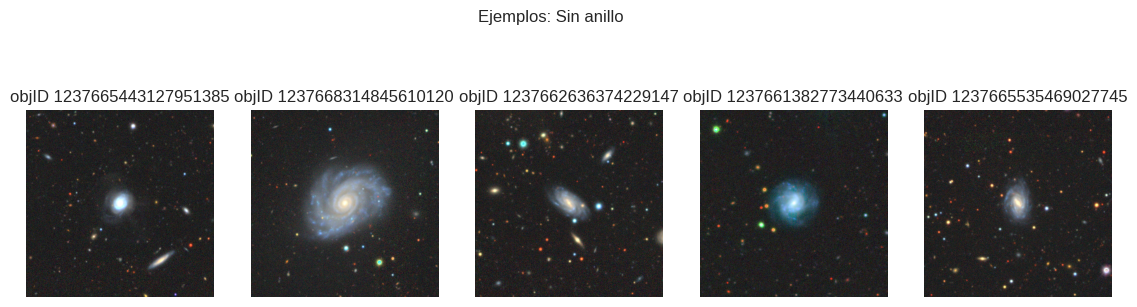

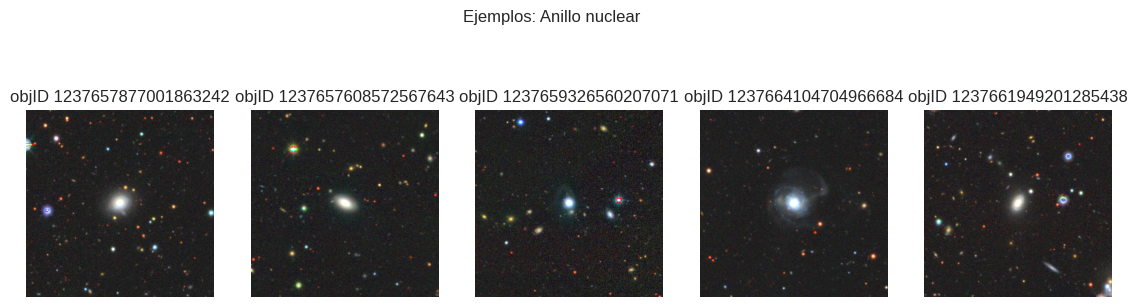

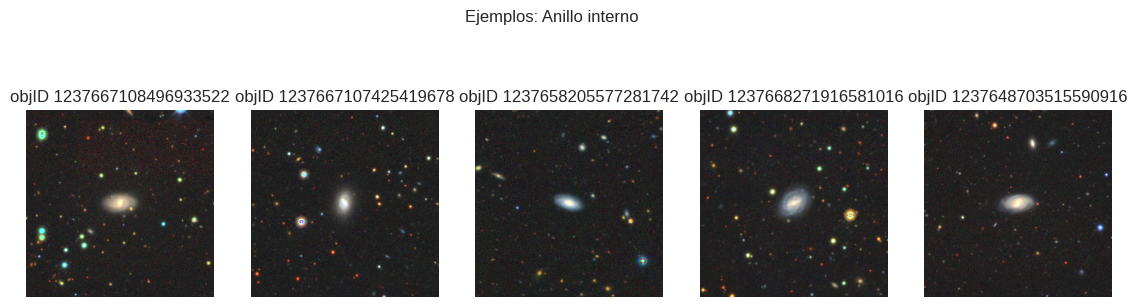

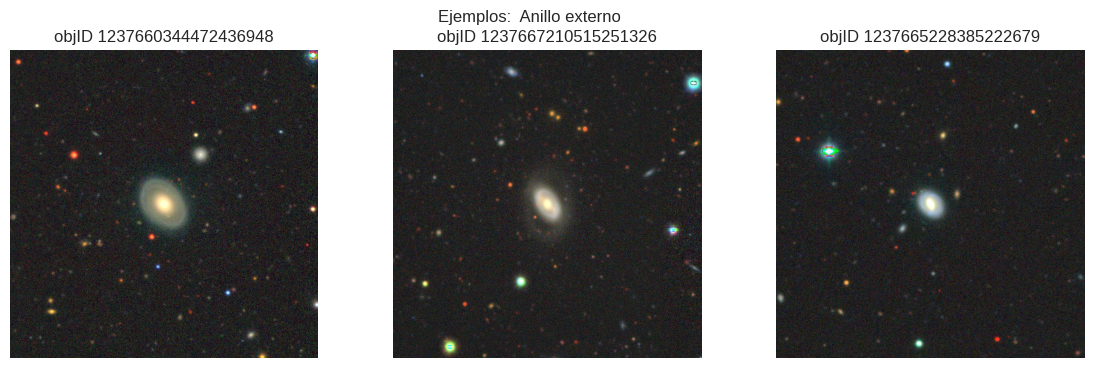

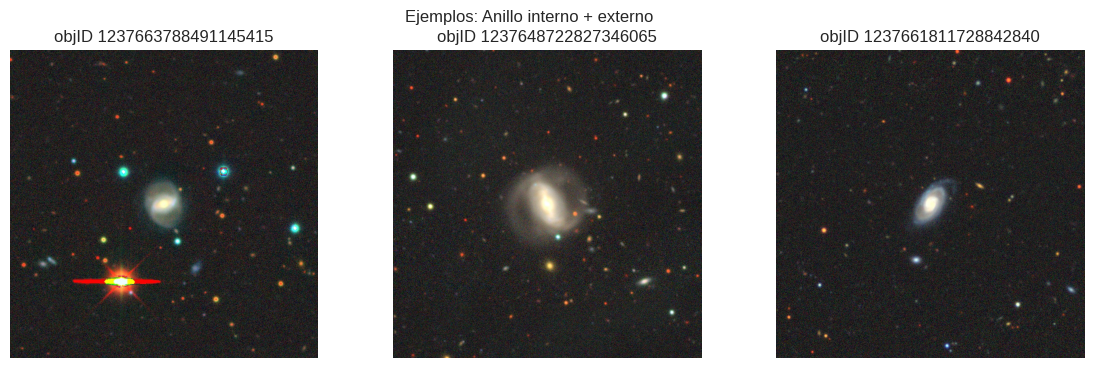

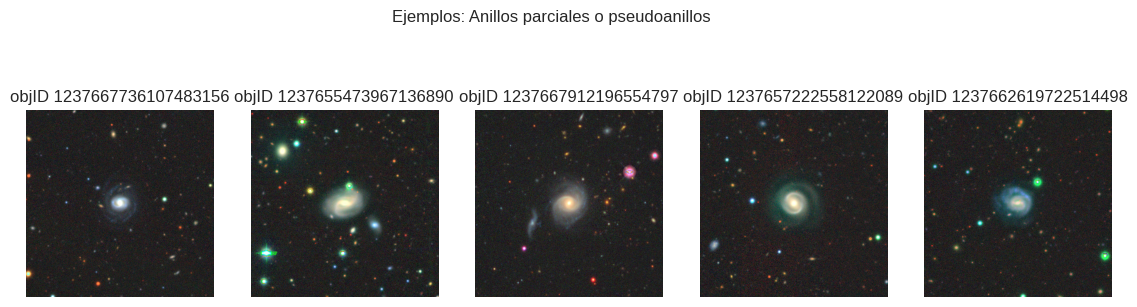

In [25]:
def show_examples(df_in, title, n=5):
    subset = df_in[df_in["img_path"].notnull()].sample(n=min(n, df_in["img_path"].notnull().sum()), random_state=42)
    plt.figure(figsize=(14, 4))
    for i, (_, row) in enumerate(subset.iterrows()):
        img = Image.open(row["img_path"]).convert("RGB")
        plt.subplot(1, len(subset), i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"objID {int(row['objID'])}")
    plt.suptitle(title)
    plt.show()

show_examples(df[df["anillos"]==0.0], "Ejemplos: Sin anillo", n=5)
show_examples(df[df["anillos"]==2.0], "Ejemplos: Anillo nuclear", n=5)
show_examples(df[df["anillos"]==4.0], "Ejemplos: Anillo interno", n=5)
show_examples(df[df["anillos"]==8.0], "Ejemplos:  Anillo externo", n=5)
show_examples(df[df["anillos"]==12.0], "Ejemplos: Anillo interno + externo", n=5)
show_examples(df[df["anillos"]==16.0], "Ejemplos: Anillos parciales o pseudoanillos", n=5)


### Conclusiones del EDA de imágenes

- Se verificó la existencia de imágenes JPEG asociadas a los registros tabulares mediante el identificador `objID`.
- Se caracterizaron propiedades básicas de las imágenes (dimensiones y número de canales). En caso de observar variabilidad en tamaños, será necesario aplicar **redimensionamiento** para alimentar modelos de visión computacional.
- Se evaluó la presencia de archivos corruptos/no legibles en una muestra, lo cual permite depurar el dataset antes del entrenamiento.
- La inspección visual sugiere variaciones en brillo/contraste y escala aparente del objeto, por lo que será relevante considerar **normalización** y un pipeline de preprocesamiento consistente.


### 7.1 Imágenes: Intensidad promedio (greyscale) vs clase

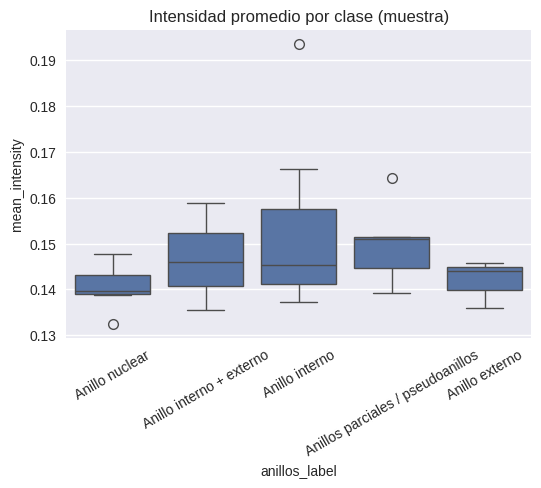

In [26]:
# Intensidad promedio simple (promedio de pixeles en escala de grises)
if n_with_img > 0:
    intensity = []
    sample_for_int = df[df["img_path"].notnull()].sample(n=min(500, n_with_img), random_state=42)
    for _, row in sample_for_int.iterrows():
        try:
            with Image.open(row["img_path"]) as im:
                im = im.convert("L")  # grayscale
                arr = np.array(im) / 255.0
            intensity.append([row["anillos_label"], arr.mean()])
        except:
            pass

    int_df = pd.DataFrame(intensity, columns=["anillos_label", "mean_intensity"])

    plt.figure(figsize=(6,4))
    sns.boxplot(x="anillos_label", y="mean_intensity", data=int_df)
    plt.xticks(rotation=30)
    plt.title("Intensidad promedio por clase (muestra)")
    plt.show()


### 7.2 Imágenes: Histograma de intensidades por color vs clase


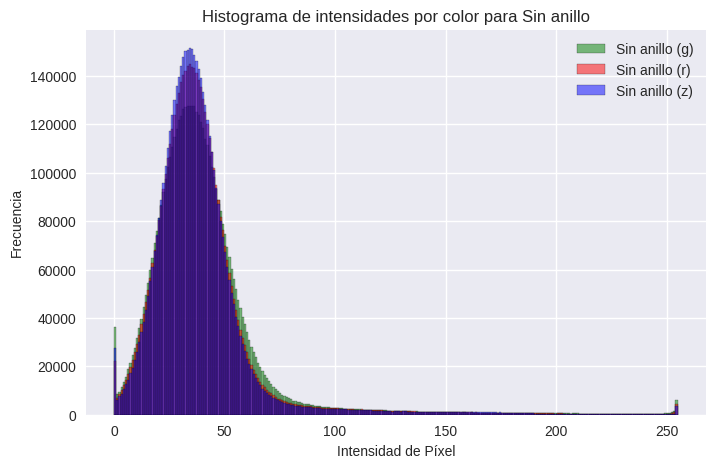

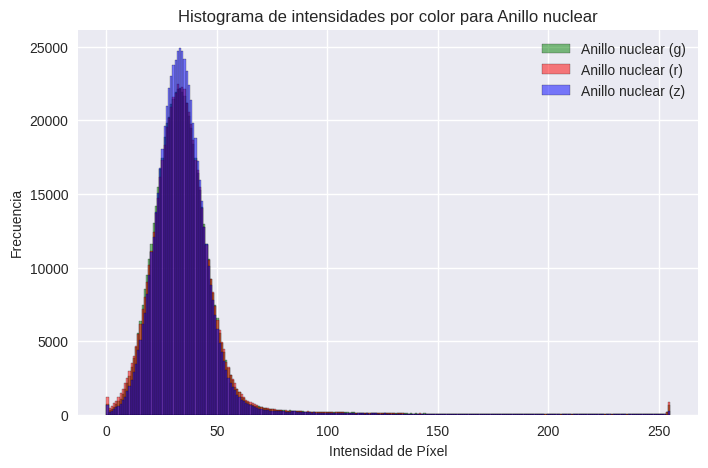

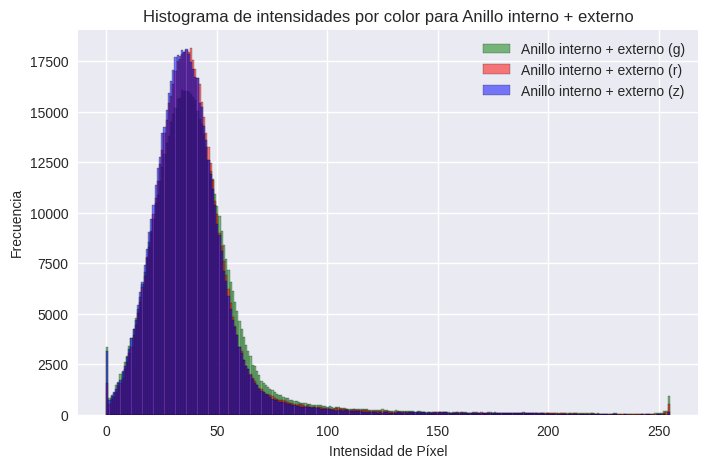

In [27]:
# Intensidad promedio simple (promedio de pixeles en escala de colores)
ring_map_for_plot = {
    0.0: "Sin anillo",
    2.0: "Anillo nuclear",
    4.0: "Anillo interno",
    8.0: "Anillo externo",
    12.0: "Anillo interno + externo",
    16.0: "Anillos parciales / pseudoanillos"
}

if n_with_img > 0:
    g_intensity_data = [] # Lista de (anillos_value, flattened_band_array)
    r_intensity_data = []
    z_intensity_data = []

    sample_for_int = df[df["img_path"].notnull()].sample(n=min(10, n_with_img), random_state=42)
    for _, row in sample_for_int.iterrows():
        try:
            with Image.open(row["img_path"]) as im:
                im = im.convert("RGB")  # color
                arr = np.array(im)
                g_intensity_data.append((row["anillos"], arr[:,:,0].flatten())) # Usar append con tuple
                r_intensity_data.append((row["anillos"], arr[:,:,1].flatten())) # Usar append con tuple
                z_intensity_data.append((row["anillos"], arr[:,:,2].flatten())) # Usar append con tuple
        except:
            pass

    # Iterar sobre las clases de anillos definidos para graficar
    for ring_value, ring_label in ring_map_for_plot.items():
        g_pixel_arrays = [pixel_array for an_val, pixel_array in g_intensity_data if an_val == ring_value]
        g_intensity_values = np.concatenate(g_pixel_arrays) if g_pixel_arrays else np.array([])

        r_pixel_arrays = [pixel_array for an_val, pixel_array in r_intensity_data if an_val == ring_value]
        r_intensity_values = np.concatenate(r_pixel_arrays) if r_pixel_arrays else np.array([])

        z_pixel_arrays = [pixel_array for an_val, pixel_array in z_intensity_data if an_val == ring_value]
        z_intensity_values = np.concatenate(z_pixel_arrays) if z_pixel_arrays else np.array([])

        # Graficar solo si hay valores para la clase actual
        if g_intensity_values.size > 0 or r_intensity_values.size > 0 or z_intensity_values.size > 0:
            plt.figure(figsize=(8, 5))
            if g_intensity_values.size > 0:
                sns.histplot(g_intensity_values, bins=256, alpha=0.5, label=f"{ring_label} (g)", color='green', stat='count')
            if r_intensity_values.size > 0:
                sns.histplot(r_intensity_values, bins=256, alpha=0.5, label=f"{ring_label} (r)", color='red', stat='count')
            if z_intensity_values.size > 0:
                sns.histplot(z_intensity_values, bins=256, alpha=0.5, label=f"{ring_label} (z)", color='blue', stat='count')

            plt.title(f"Histograma de intensidades por color para {ring_label}")
            plt.xlabel("Intensidad de Píxel")
            plt.ylabel("Frecuencia")
            plt.legend()
            plt.show()

## 8. Problemas identificados y acciones de preprocesamiento

Con base en el EDA tabular e imágenes, se identifican los siguientes aspectos relevantes:

- **Valores faltantes:** no se detectaron valores faltantes en la tabla.
- **Duplicados:** no se detectaron registros duplicados.
- **Desbalance de clases:** la variable objetivo `target_ring` presenta una fuerte dominancia de la clase “sin anillo”.
- **Variable `anillos` de alta cardinalidad semántica:** se definió `target_ring` para reducir complejidad inicial.
- **Imágenes:** se debe validar consistencia en tamaños, detectar corruptas y estandarizar preprocesamiento (normalización, resize).

Acciones propuestas:
- Filtrar registros sin imagen o con imagen corrupta.
- Definir un tamaño objetivo (ej. 224×224 o 256×256) para redimensionamiento.
- Normalizar pixeles (0–1) y considerar estandarización por canal si se usa un modelo preentrenado.
- Considerar técnicas para desbalance: ponderación de clases y/o data augmentation.


## 9. Conclusiones finales del Análisis Exploratorio de Datos

En este avance se realizó un Análisis Exploratorio de Datos (EDA) integral del conjunto de datos, abarcando tanto información tabular como imágenes astronómicas, con el objetivo de comprender la estructura, calidad y limitaciones de los datos antes del modelado.

A continuación, se resumen los principales hallazgos y decisiones tomadas:

### Calidad y estructura de los datos
- El conjunto de datos está compuesto por **8,528 galaxias** y **5 variables tabulares**, sin presencia de valores faltantes ni registros duplicados.
- Las variables astronómicas (`ra`, `dec`, `z`) presentan rangos físicamente plausibles y coherentes con observaciones reales.
- La variable `anillos` es una **variable categórica codificada** con múltiples clases que representan diferentes tipos de estructuras morfológicas.

### Distribución y desbalance de clases
- La variable `anillos` presenta una distribución altamente desbalanceada, con predominancia de galaxias sin anillo.
- Para la Tarea 1, se definió una **variable objetivo binaria (`target_ring`)**, distinguiendo galaxias sin anillo de aquellas con anillo interno y/o externo.
- Bajo esta definición, aproximadamente el **83 %** de las observaciones corresponden a la clase mayoritaria (sin anillo), lo que deberá ser considerado explícitamente durante el entrenamiento de modelos.

### Análisis univariante y bivariado
- Las variables `ra` y `dec` reflejan una cobertura no uniforme del cielo, consistente con la región observada por el estudio.
- El redshift (`z`) presenta una distribución sesgada hacia valores bajos, indicando que la muestra está dominada por galaxias cercanas.
- El análisis bivariado entre `z` y la variable objetivo mostró una **alta superposición entre clases**, lo que sugiere que las variables tabulares por sí solas tienen una capacidad limitada para discriminar la presencia de anillos.

### Exploración de imágenes
- Se descargó una muestra de imágenes JPEG desde **Legacy Survey (ls-dr9, bandas grz)** y se verificó su correcta lectura.
- Las imágenes presentan variabilidad en tamaño, brillo y contraste, así como diferencias en la escala aparente de las galaxias.
- La inspección visual confirmó que la información morfológica relevante para la detección de anillos se encuentra principalmente en las imágenes, reforzando la necesidad de emplear técnicas de visión computacional.

### Problemas identificados y acciones de preprocesamiento
- No se requieren acciones de imputación ni eliminación de registros a nivel tabular.
- Será necesario aplicar **redimensionamiento y normalización de imágenes** para garantizar consistencia en el entrenamiento.
- El desbalance de clases justifica el uso de estrategias como **ponderación de clases** y **aumento de datos** en etapas posteriores.
- Se propone generar un índice limpio que relacione rutas de imágenes con la variable objetivo para su uso en el pipeline de modelado.

En conjunto, el EDA permitió identificar las características clave del conjunto de datos, validar su calidad y definir decisiones fundamentales de preprocesamiento y formulación del problema, sentando una base sólida para el desarrollo de modelos de aprendizaje automático en las siguientes fases del proyecto.


## 10. Referencias

Fernández, J. A., et al. (2021). *Ringed galaxies in the local universe: Identification and classification of galactic rings*. Astronomy & Astrophysics.  

Kumar Mukhiya, S., & Ahmed, U. (2020). *Hands-On Exploratory Data Analysis with Python*. Packt Publishing.

Visengeriyeva, L., Kammer, A., Bär, I., Kniesz, A., & Plöd, M. (2023). *CRISP-ML(Q): The ML lifecycle process*. INNOQ. https://ml-ops.org/content/crisp-ml

Legacy Survey Collaboration. (2023). *The Legacy Survey (DR10)*. https://www.legacysurvey.org

Astropy Collaboration. (2018). *Astropy: A community Python package for astronomy*. The Astronomical Journal, 156(3), 123. https://doi.org/10.3847/1538-3881/aabc4f
